In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns
!git clone https://github.com/DavidRozenblumStudent/statisics_course_data_files

Cloning into 'statisics_course_data_files'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 5), reused 16 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 521.24 KiB | 3.45 MiB/s, done.
Resolving deltas: 100% (5/5), done.


**Q1**

In [ ]:
heights_data = pd.read_csv('statisics_course_data_files/heights.csv')
X = heights_data.loc[:, 'HEIGHT'].values
Y = heights_data.loc[:, 'WEIGHT'].values

**A**

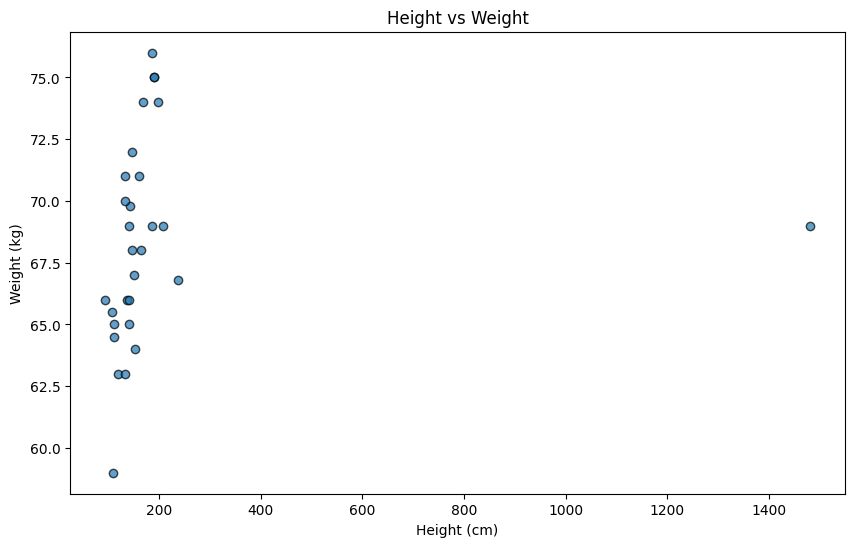

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, edgecolors='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

**B**

In [ ]:
def robust_linear_regression(X, Y):
    Y_h = Y[math.ceil(len(X) * 2 / 3):]
    Y_l = Y[:math.ceil(len(X) * 1 / 3)]

    b = (np.median(Y_h) - np.median(Y_l)) / (X[math.ceil(len(X) * 5 / 6)] - X[math.ceil(len(X) * 1 / 6)])
    a = np.median(Y - b * X)

    return b, a
robust_linear_regression(X, Y)

(np.float64(0.08333333333333333), np.float64(55.66666666666667))

In [ ]:
def least_squares_regression(X, Y):
        X_mean = np.mean(X)
        Y_mean = np.mean(Y)
        # Calculate the slope (b) and intercept (a) using least squares method
        b = (np.sum((X - X_mean) * (Y - Y_mean))) / (np.sum((X - X_mean)**2))
        a = Y_mean - b * X_mean
        return b, a
least_squares_regression(X, Y)

(np.float64(0.0018456444858739314), np.float64(67.93289611750745))

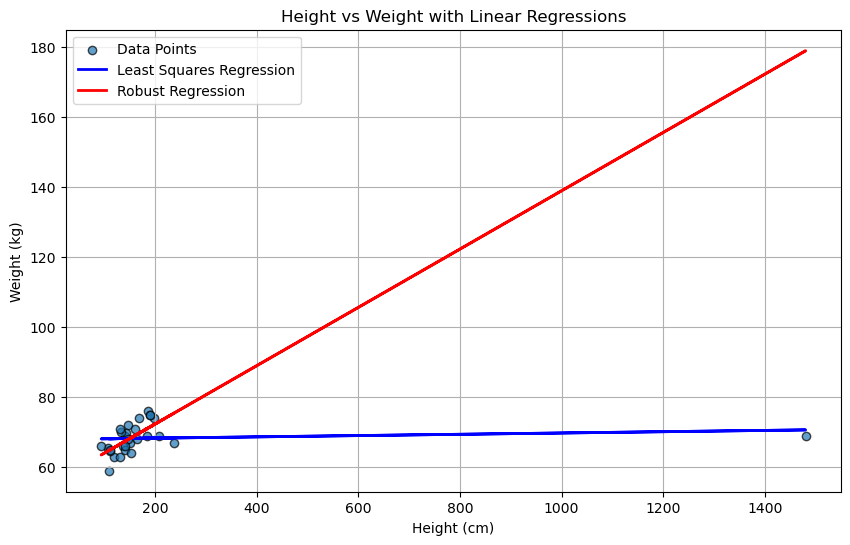

In [ ]:
plt.figure(figsize=(10, 6))
b, a = least_squares_regression(X, Y)
c, d = robust_linear_regression(X, Y)
plt.scatter(X, Y, alpha=0.7, edgecolors='k')
plt.plot(X, b * X + a, color='blue', linewidth=2)
plt.plot(X, c * X + d, color='red', linewidth=2)
plt.legend(['Data Points', 'Least Squares Regression', 'Robust Regression'])
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Linear Regressions')
plt.show()

**D**

In [ ]:
def variance(X):
    return (np.sum((X - np.mean(X))** 2) / len(X))

def covariance(X, Y):
    return np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / len(X)

def correlation(X, Y):
    num = covariance(X, Y)
    vx= variance(X)
    vy= variance(Y)
    denom = math.sqrt(variance(X) * variance(Y))
    return num / denom
    #return covariance(X, Y) / math.sqrt(variance(X) * variance(Y))

def R2(X, Y):
    b, a = least_squares_regression(X, Y)
    return (1 - np.sum((Y - (b * X + a))**2) / np.sum((Y - np.mean(Y))**2))

In [ ]:
b, a = least_squares_regression(X, Y)
print('slope:', b)
print('correlation:', correlation(X, Y))
print('correlation calculated using linear regression slope:', b * math.sqrt(variance(X) / variance(Y)))
print('R2:', R2(X, Y))
print('R2 calculated with r^2:', correlation(X, Y)**2)

slope: 0.0018456444858739314
correlation: 0.11163594809565446
correlation calculated using linear regression slope: 0.11163594809565446
R2: 0.012462584907215302
R2 calculated with r^2: 0.012462584907215656


**E**

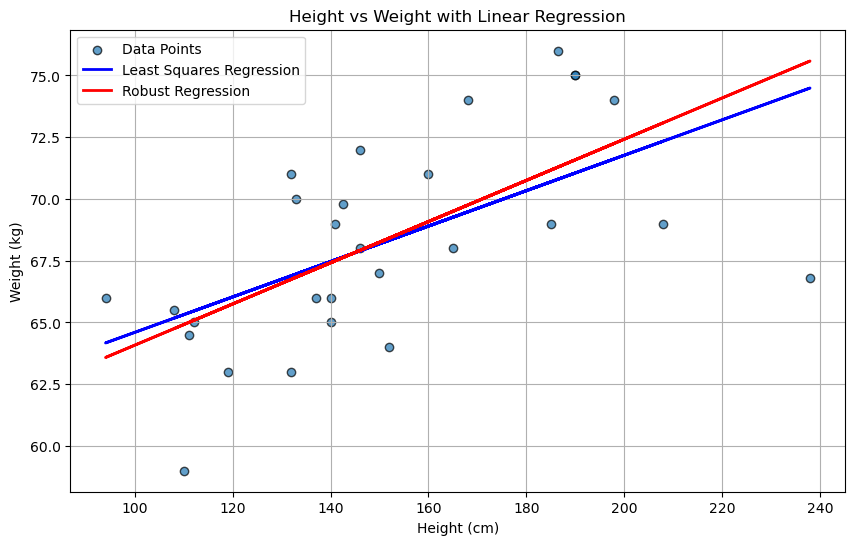

slope: 0.07165444334473373
correlation: 0.5857442860266672
correlation calculated using linear regression slope: 0.5857442860266673
R2: 0.3430963686128905
R2 calculated with r^2: 0.34309636861289006


In [ ]:
# Remove the outlier
new_Y = np.delete(Y, np.argmax(X))
new_X = np.delete(X, np.argmax(X))

# second time B
plt.figure(figsize=(10, 6))
b, a = least_squares_regression(new_X, new_Y)
c, d = robust_linear_regression(new_X, new_Y)
plt.scatter(new_X, new_Y, alpha=0.7, edgecolors='k')
plt.plot(new_X, b * new_X + a, color='blue', linewidth=2)
plt.plot(new_X, c * new_X + d, color='red', linewidth=2)
plt.legend(['Data Points', 'Least Squares Regression', 'Robust Regression'])
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Linear Regression')
plt.show()

# second time D
print('slope:', b)
print('correlation:', correlation(new_X, new_Y))
print('correlation calculated using linear regression slope:', b * math.sqrt(variance(new_X) / variance(new_Y)))
print('R2:', R2(new_X, new_Y))
print('R2 calculated with r^2:', correlation(new_X, new_Y)**2)


**Q2**

In [2]:
data = pd.read_csv('statisics_course_data_files/Age_And_Time.csv')
Ages = data.loc[:, 'Age'].values.reshape(-1,1)
Times = data.loc[:, 'Time'].values

**A**

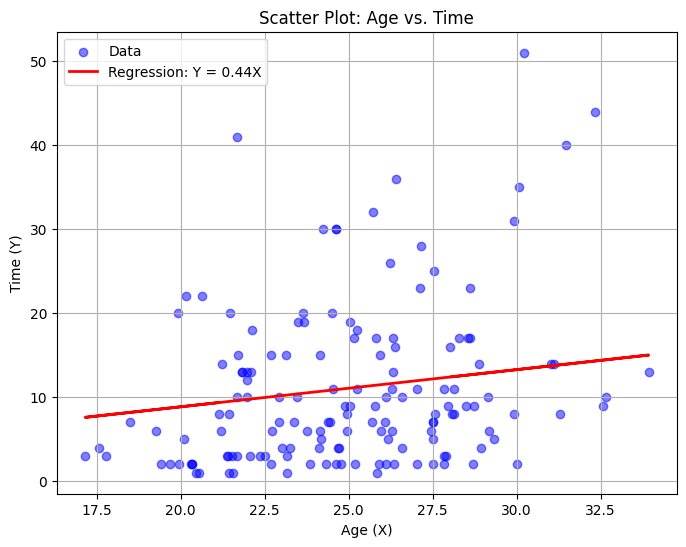

R²: 0.5890


In [8]:
def least_squares_without_intercept(X, Y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, color='blue', alpha=0.5, label='Data')
    plt.xlabel('Age (X)')
    plt.ylabel('Time (Y)')
    plt.title('Scatter Plot: Age vs. Time')
    plt.grid(True)
    # Fit Y = bX (No Intercept) Using least squares with intercept forced to 0
    b = np.linalg.lstsq(X, Y, rcond=None)[0][0]  # Solve for slope (b)
    Y_pred = b * X

    plt.plot(X, Y_pred, color='red', linewidth=2, label=f'Regression: Y = {b:.2f}X')
    plt.legend()
    plt.show()

    mone = np.sum((Y - Y_pred.flatten()) ** 2)
    # mehane = np.sum((Y - np.mean(Y)) ** 2)
    mehane = np.sum((Y) ** 2) # FIX!!!
    R_squared = 1 - (mone / mehane)
    # print(f"Slope (b): {b:.4f}")
    print(f"R²: {R_squared:.4f}")

least_squares_without_intercept(Ages,Times)

**B+C**

Original


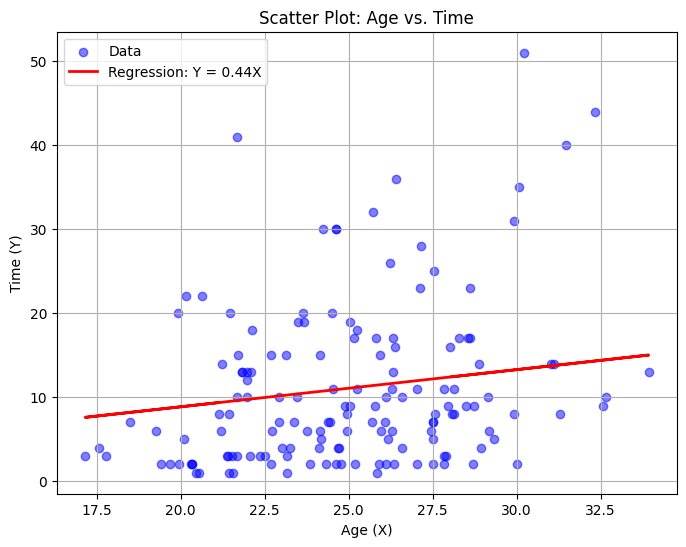

R²: 0.5890
Log


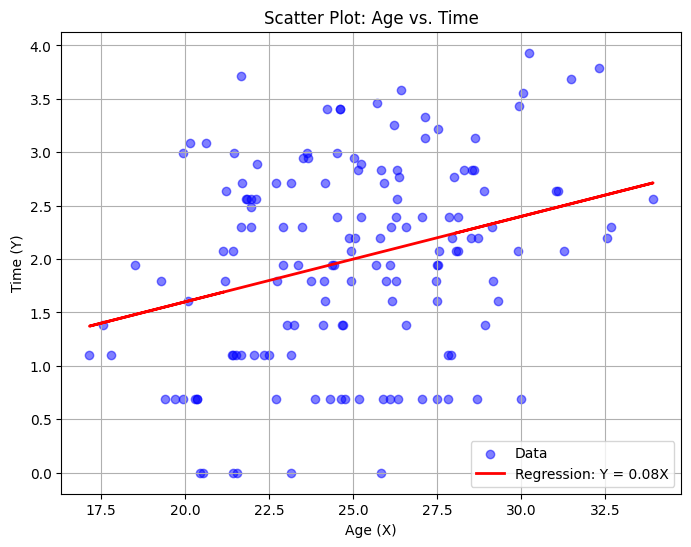

R²: 0.8361
Square Root


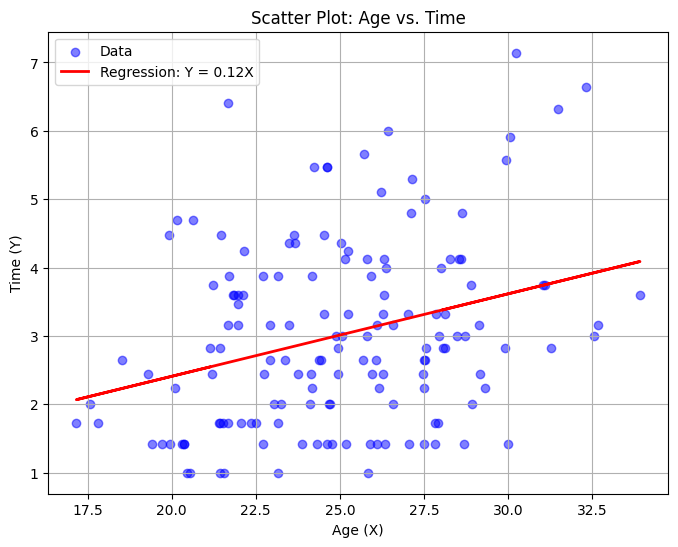

R²: 0.8472
Reciprocal


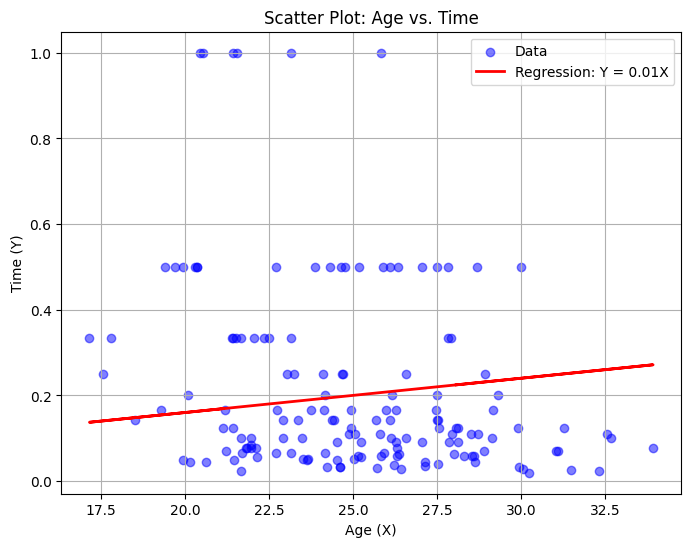

R²: 0.4359


In [9]:
mask = Times <= 30
# X_clean = Ages[mask]
# Y_clean = Times[mask]
X_clean = Ages
Y_clean = Times
# Define transformations
transformations = {
    'Original': lambda y: y,
    'Log': lambda y: np.log(y),
    'Square Root': np.sqrt,
    'Reciprocal': lambda y: 1 / (y),
}
# Test all transformations
results = {}
for name, transform in transformations.items():
    Y_transformed = transform(Y_clean)
    print(name)
    least_squares_without_intercept(X_clean, Y_transformed)

##D

In [ ]:
def test_three_models(X1,X2,Y):
    # 1. Model: Y = b0 + b1*X1
    X1_with_intercept = np.column_stack((np.ones(len(X1)), X1))
    b1, residuals1, rank1, s1 = np.linalg.lstsq(X1_with_intercept, Y, rcond=None)
    Y_pred1 = X1_with_intercept @ b1
    TSS = np.sum((Y - np.mean(Y))**2)
    ESS1 = np.sum((Y_pred1 - np.mean(Y))**2)
    explained_variance1 = ESS1 / TSS

    # 2. Model: Y = b0 + b1*X2
    X2_with_intercept = np.column_stack((np.ones(len(X2)), X2))
    b2, residuals2, rank2, s2 = np.linalg.lstsq(X2_with_intercept, Y, rcond=None)
    Y_pred2 = X2_with_intercept @ b2
    ESS2 = np.sum((Y_pred2 - np.mean(Y))**2)
    explained_variance2 = ESS2 / TSS

    # 3. Model: Y = b0 + b1*X1 + b2*X2
    X_both_with_intercept = np.column_stack((np.ones(len(X1)), X1, X2))
    b3, residuals3, rank3, s3 = np.linalg.lstsq(X_both_with_intercept, Y, rcond=None)
    Y_pred3 = X_both_with_intercept @ b3
    ESS3 = np.sum((Y_pred3 - np.mean(Y))**2)
    explained_variance3 = ESS3 / TSS

    print("\nModel 1: Y = b0 + b1*X1")
    print(f"b0 = {b1[0]:.4f}")
    print(f"b1 = {b1[1]:.4f}")
    print(f"Explained variance: {explained_variance1*100:.2f}%")
    print("\nModel 2: Y = b0 + b1*X2")
    print(f"b0 = {b2[0]:.4f}")
    print(f"b1 = {b2[1]:.4f}")
    print(f"Explained variance: {explained_variance2*100:.2f}%")
    print("\nModel 3: Y = b0 + b1*X1 + b2*X2")
    print(f"b0 = {b3[0]:.4f}")
    print(f"b1 = {b3[1]:.4f}")
    print(f"b2 = {b3[2]:.4f}")
    print(f"Explained variance: {explained_variance3*100:.2f}%")

    # Determine which model has the highest explained variance
    max_variance = max(explained_variance1, explained_variance2, explained_variance3)
    if max_variance == explained_variance1:
        best_model = "Model 1: Y = b0 + b1*X1"
    elif max_variance == explained_variance2:
        best_model = "Model 2: Y = b0 + b1*X2"
    else:
        best_model = "Model 3: Y = b0 + b1*X1 + b2*X2"

    print(f"\Model with the biggest explained variance: {best_model} ({max_variance*100:.2f}%)")

In [ ]:
countries = pd.read_csv('statisics_course_data_files/countries.csv')
X1 = countries['income']
X2 = countries['education']
Y = countries['life_expectancy']

test_three_models(X1,X2,Y)


Model 1: Y = b0 + b1*X1
b0 = 67.8769
b1 = 0.0000
Explained variance: 39.28%

Model 2: Y = b0 + b1*X2
b0 = 63.1463
b1 = 0.8469
Explained variance: 10.34%

Model 3: Y = b0 + b1*X1 + b2*X2
b0 = 63.3403
b1 = 0.0000
b2 = 0.4671
Explained variance: 42.24%
\Model with the biggest explained variance: Model 3: Y = b0 + b1*X1 + b2*X2 (42.24%)


**E**

**Q3**

In [ ]:
X1_log = np.log(X1)
X2 = countries['education']
Y = countries['life_expectancy']

test_three_models(X1_log,X2,Y)


Model 1: Y = b0 + b1*X1
b0 = 42.7108
b1 = 2.7698
Explained variance: 58.84%

Model 2: Y = b0 + b1*X2
b0 = 63.1463
b1 = 0.8469
Explained variance: 10.34%

Model 3: Y = b0 + b1*X1 + b2*X2
b0 = 41.5096
b1 = 2.6747
b2 = 0.2136
Explained variance: 59.43%
\Model with the biggest explained variance: Model 3: Y = b0 + b1*X1 + b2*X2 (59.43%)


**A**

In [ ]:
X3 = stats.norm.rvs(size=30, loc = 5, scale = 1)

**B**

In [ ]:
Y3 = (5 * X3) + 2

**C**

In [ ]:
print('Correlation:', correlation(X3, Y3))

Correlation: 1.0000000000000002


**D**

In [ ]:
b, a = least_squares_regression(X3, Y3)
print('Slope:', b)

Slope: 5.000000000000001


**E**

In [ ]:
noise = stats.norm.rvs(size=30, loc = 0, scale = 1)
Y3_with_noise = Y3 + noise
print('Correlation:', correlation(X3, Y3_with_noise))
b, a = least_squares_regression(X3, Y3_with_noise)
print('Slope:', b)

Correlation: 0.962107497483807
Slope: 5.272260322722811


**F**

In [ ]:
r_values = []
b_values = []
noise_std = np.array(range(5, 101)) / 10
for i in noise_std:
    noise = stats.norm.rvs(size=30, loc = 0, scale = i)
    Y3_with_noise = Y3 + noise
    r_values.append(correlation(X3, Y3_with_noise))
    b, a = least_squares_regression(X3, Y3_with_noise)
    b_values.append(b)

**G**

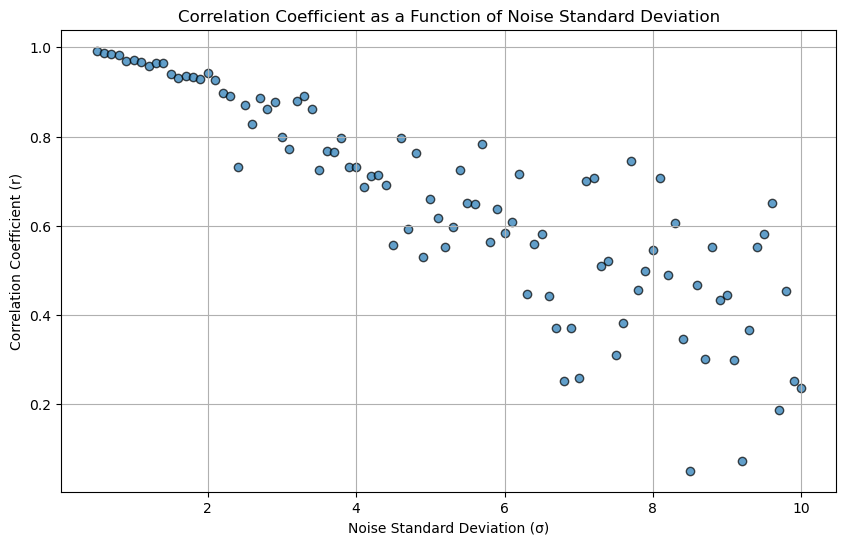

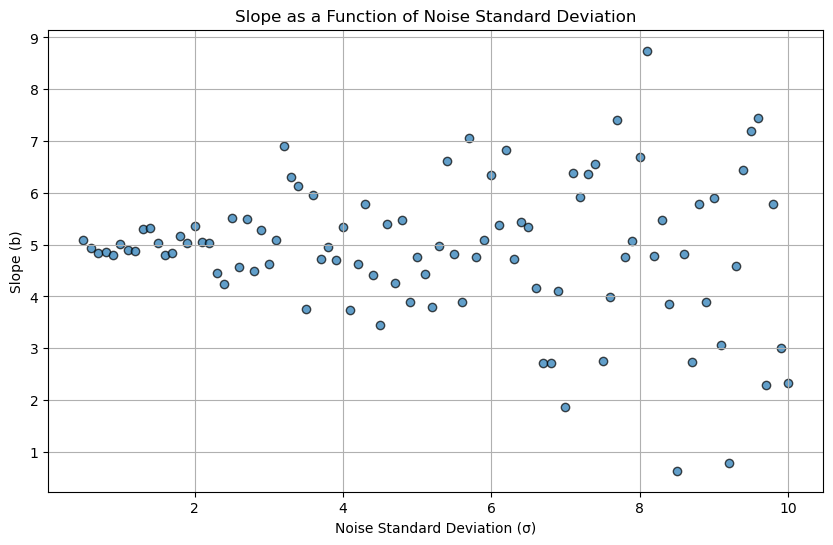

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(noise_std, r_values, alpha=0.7, edgecolors='k')
plt.xlabel('Noise Standard Deviation (σ)')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Correlation Coefficient as a Function of Noise Standard Deviation')
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(noise_std, b_values, alpha=0.7, edgecolors='k')
plt.xlabel('Noise Standard Deviation (σ)')
plt.ylabel('Slope (b)')
plt.title('Slope as a Function of Noise Standard Deviation')
plt.grid()
plt.show()

**Q4**

**B**

<Axes: xlabel='2 dice roll', ylabel='Density'>

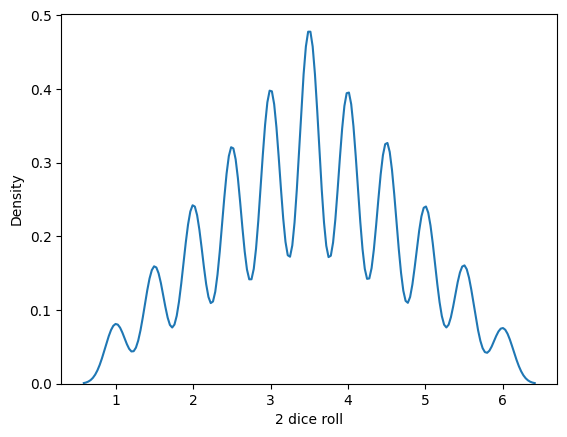

In [ ]:
X4_2 = stats.randint.rvs(low=1, high=7, size=50000) + stats.randint.rvs(low=1, high=7, size=50000)
X4_2 = X4_2 / 2
X4_2_df = pd.DataFrame(X4_2, columns=['2 dice roll'])
# sns.kdeplot(data=X4_2_df, x='2 dice roll', bw_adjust=3)
sns.kdeplot(data=X4_2_df, x='2 dice roll')

**C**

In [ ]:
print('Mean:', np.mean(X4_2))
print('Standard Deviation:', math.sqrt(variance(X4_2)))

Mean: 3.50036
Standard Deviation: 1.2052343632671614


**D**

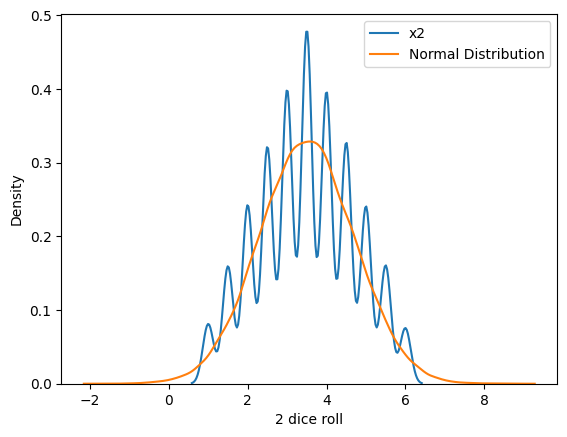

In [ ]:
normal_dist = stats.norm.rvs(size=50000, loc = 3.5, scale = math.sqrt(35/24))
X4_2_df['Normal Distribution'] = normal_dist
sns.kdeplot(data=X4_2_df, x='2 dice roll')
# sns.kdeplot(data=X4_2_df, x='Normal Distribution', bw_adjust=2)
sns.kdeplot(data=X4_2_df, x='Normal Distribution')
plt.legend(['x2', 'Normal Distribution'])

**E**

Sample Size: 10
mean: 3.25
standard deviation: 0.6800735254367721
Sample Size: 100
mean: 3.525
standard deviation: 1.2695963925594624
Sample Size: 1000
mean: 3.516
standard deviation: 1.2311555547533384
Sample Size: 10000
mean: 3.5124
standard deviation: 1.2169824320835532
Sample Size: 100000
mean: 3.50299
standard deviation: 1.2068703575363844


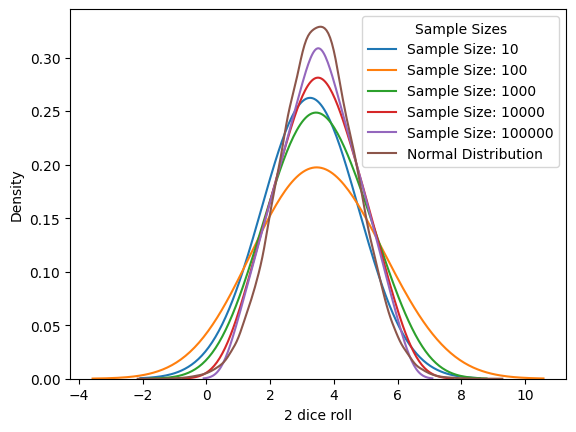

In [ ]:
sample_sizes = [10, 100, 1000, 10000, 100000]
for sample_size in sample_sizes:
    X4_2_sample = stats.randint.rvs(low=1, high=7, size=sample_size) + stats.randint.rvs(low=1, high=7, size=sample_size)
    X4_2_sample = X4_2_sample / 2
    X4_2_sample_df = pd.DataFrame(X4_2_sample, columns=['2 dice roll'])
    sns.kdeplot(data=X4_2_sample_df, x='2 dice roll', bw_adjust=3, label=f'Sample Size: {sample_size}')
    # sns.kdeplot(data=X4_2_sample_df, x='2 dice roll', label=f'Sample Size: {sample_size}')

    print(f'Sample Size: {sample_size}')
    print('mean:', np.mean(X4_2_sample))
    print('standard deviation:', math.sqrt(variance(X4_2_sample)))
# sns.kdeplot(data=X4_2_df, x='Normal Distribution', bw_adjust=3, label='Normal Distribution')
sns.kdeplot(data=X4_2_df, x='Normal Distribution', label='Normal Distribution')
plt.legend(title='Sample Sizes')

Sample Size: 2 dice
mean: 3.50347
standard deviation: 1.2082147818579276
---
Sample Size: 4 dice
mean: 3.502335
standard deviation: 0.8520362655280584
---
Sample Size: 8 dice
mean: 3.50591
standard deviation: 0.6040607973540412
---
Sample Size: 16 dice
mean: 3.49968125
standard deviation: 0.42896256570176083
---
Sample Size: 32 dice
mean: 3.501635625
standard deviation: 0.2998698945161207
---


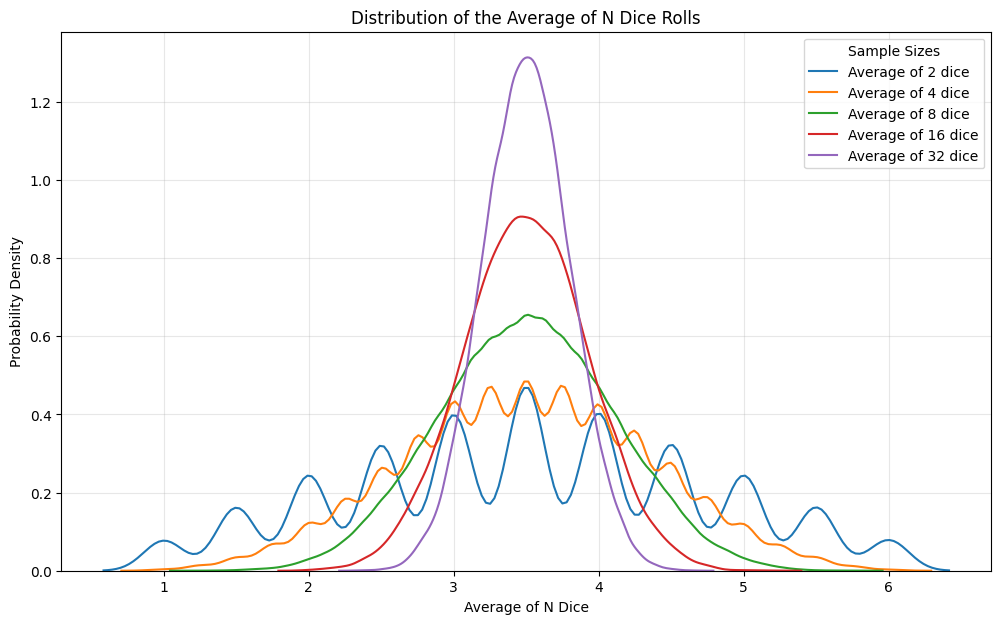

In [ ]:
sample_sizes = [2, 4, 8, 16, 32]
plt.figure(figsize=(12, 7))
# For storing the original 2-dice data
X4_2 = stats.randint.rvs(low=1, high=7, size=50000) + stats.randint.rvs(low=1, high=7, size=50000)
X4_2 = X4_2 / 2
X4_2_df = pd.DataFrame(X4_2, columns=['2 dice roll'])

# Loop through each sample size
for sample_size in sample_sizes:
    X4_N_sample = np.zeros(50000)
    # For each trial, roll 'sample_size' dice and take their average
    for i in range(50000):
        # Generate sample_size dice rolls and take their average
        dice_rolls = stats.randint.rvs(low=1, high=7, size=sample_size)
        X4_N_sample[i] = np.mean(dice_rolls)
    X4_N_sample_df = pd.DataFrame(X4_N_sample, columns=[f'{sample_size} dice roll'])
    # Plot KDE for the average of sample_size dice
    # sns.kdeplot(data=X4_N_sample_df, x=f'{sample_size} dice roll', bw_adjust=3, label=f'Average of {sample_size} dice')
    sns.kdeplot(data=X4_N_sample_df, x=f'{sample_size} dice roll', label=f'Average of {sample_size} dice')

    print(f'Sample Size: {sample_size} dice')
    print('mean:', np.mean(X4_N_sample))
    print('standard deviation:', np.std(X4_N_sample))
    print('---')

# Add plot details
plt.xlabel('Average of N Dice')
plt.ylabel('Probability Density')
plt.title('Distribution of the Average of N Dice Rolls')
plt.grid(True, alpha=0.3)
plt.legend(title='Sample Sizes')

plt.show()